In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('D:/Data Science/Assignment/04Simple liner regration/delivery_time.csv')
df


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#check data type
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [4]:
#in column name we find space so we are remove the space 
df= df.rename({'Delivery Time':'Deliverytime','Sorting Time':'Sortingtime'},axis=1)

In [5]:
df.dtypes

Deliverytime    float64
Sortingtime       int64
dtype: object

In [6]:
#find the missing values
df.isna().sum()

Deliverytime    0
Sortingtime     0
dtype: int64

### There is no missing value so no need of imputation

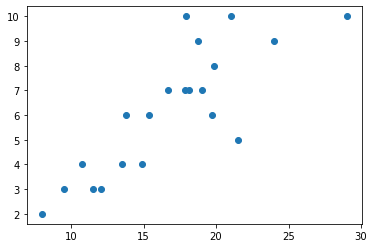

In [7]:
#data visulization
plt.scatter(df['Deliverytime'],df['Sortingtime'])

In [8]:
df.corr()

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


### here variable are highly associated and in beetween relation is linear so we can apply the linear regrassion

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols('Deliverytime~Sortingtime',df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        13:01:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.pvalues

Intercept      0.001147
Sortingtime    0.000004
dtype: float64

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deliverytime', ylabel='Sortingtime'>

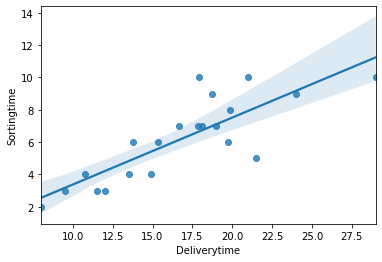

In [13]:
sns.regplot(df['Deliverytime'],df['Sortingtime'])

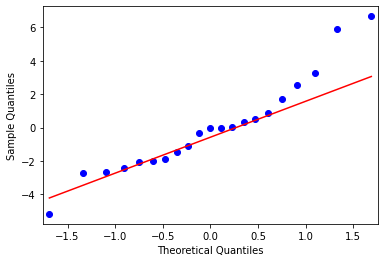

In [14]:
qq = sm.qqplot(model.resid,line='q')

In [15]:
model.rsquared

0.6822714748417231

### here rsqure value is low so there is some need to improve the model

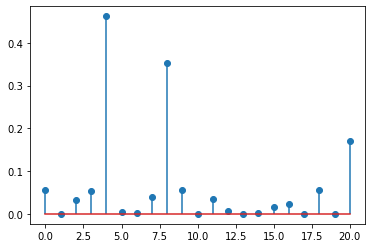

In [16]:
#calculate the cook distance
(c,_)= model.get_influence().cooks_distance
plt.stem(range((df.shape[0])),c)
plt.show()

In [17]:
#here we find some oulier so we remove the outlier
(np.argmax(c),np.max(c))
df=df.drop(df.index[[4]],axis=0).reset_index()

In [18]:
df=df.drop('index',axis=1)
df

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,17.90,10
8,18.75,9
9,19.83,8


In [19]:
#recreat the model
model=smf.ols("Deliverytime~Sortingtime",df).fit()
model.rsquared

0.660207261776224

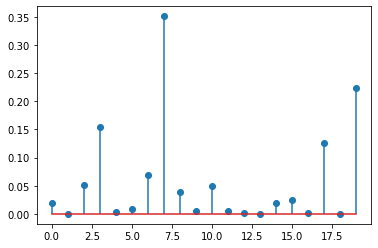

In [20]:
#again rsquared value is low so need more improvement
#again make cook distance
(c,_)=model.get_influence().cooks_distance
plt.stem(range(df.shape[0]),c)
plt.show()

In [21]:
(np.argmax(c),np.max(c))

(7, 0.35089748038778834)

In [23]:
#here 7th row may be outlier so remove 7th row
df=df.drop(df.index[[7]]).reset_index()
df

,level_0,index,Deliverytime,Sortingtime
0,0,0,21.00,10
1,1,1,13.50,4
2,2,2,19.75,6
3,3,3,24.00,9
4,4,4,15.35,6
5,5,5,19.00,7
6,6,6,9.50,3
7,8,9,19.83,8
8,9,10,10.75,4
9,10,11,16.68,7


In [27]:
# again recreate the model
model=smf.ols('Deliverytime~Sortingtime',df).fit()
model.rsquared

0.7297906768784832

In [26]:
df.corr() 

,level_0,index,Deliverytime,Sortingtime
level_0,1.000000,0.999204,-0.241986,-0.358571
index,0.999204,1.000000,-0.246788,-0.357160
Deliverytime,-0.241986,-0.246788,1.000000,0.854278
Sortingtime,-0.358571,-0.357160,0.854278,1.000000


## Why we get low rsquared value?
### In the dataset we have only sorting time so this is not enough to predict the delivery time and one more reason for low rsquare value is number of observation is less so more observation is get more accuracy.